# All localsearch algorithms examples + plotting

## imports

In [2]:
# read data
from lclpy.io.tsplib import read_tsplib

# move functions
from lclpy.localsearch.move.tsp_array_swap import TspArraySwap
from lclpy.localsearch.move.array_reverse_order import ArrayReverseOrder
from lclpy.localsearch.move.multi_neighbourhood import MultiNeighbourhood

# evaluation function
from lclpy.evaluation.tsp_evaluation_function import TspEvaluationFunction

# Problem class
from lclpy.problem.array_problem import ArrayProblem

# termination functions
from lclpy.termination.min_temperature_termination_criterion import MinTemperatureTerminationCriterion
from lclpy.termination.max_seconds_termination_criterion import MaxSecondsTerminationCriterion

# simulated annealing
from lclpy.localsearch.simulatedannealing.simulated_annealing import SimulatedAnnealing
from lclpy.localsearch.simulatedannealing.geometric_cooling_function import GeometricCoolingFunction
from lclpy.localsearch.simulatedannealing.cnst_iterations_temp_function import CnstIterationsTempFunction

# steepest descent 
from lclpy.localsearch.steepestdescent.steepest_descent import SteepestDescent

# tabu search
from lclpy.localsearch.tabusearch.sum_diff_state import SumDiffState
from lclpy.localsearch.tabusearch.tabu_search import TabuSearch

# variable neighbourhood search
from lclpy.localsearch.vns.variable_neighbourhood import VariableNeighbourhood


# plotting
from lclpy.plot.plot import plot, iterations_plot


In [3]:
# matplotlib init (only needed when using matplotlib)

%matplotlib inline
import matplotlib.pyplot as plt

## Reading the data

In [4]:
data = read_tsplib('data/gr48.tsp')
distance_matrix = data[0]
print(distance_matrix)

size = distance_matrix.shape[0]
print(size)

[[  0 593 409 ... 235 369 121]
 [593   0 258 ... 371 205 570]
 [409 258   0 ... 187 289 386]
 ...
 [235 371 187 ...   0 149 212]
 [369 205 289 ... 149   0 347]
 [121 570 386 ... 212 347   0]]
48


## simulated annealing

In [5]:
move_1 = TspArraySwap(size)

evaluation_1 = TspEvaluationFunction(distance_matrix, move_1)

problem_1 = ArrayProblem(evaluation_1, move_1, size)

termination_criterion_1 = MinTemperatureTerminationCriterion()

cooling_func = GeometricCoolingFunction(0.95)
i_for_temp = CnstIterationsTempFunction(1500)

algorithm_1 = SimulatedAnnealing(problem_1, termination_criterion_1,
                                 cooling_func, i_for_temp, benchmarking=True, logging=False)
results_1 = algorithm_1.run()
print(results_1)

Results(best_order=array([ 0, 35, 13,  8, 20, 16, 26, 31, 21,  7, 25,  5, 10, 27, 45, 17, 33,
       22, 24,  1, 34, 39, 38, 41, 19, 37, 29, 44, 36, 23, 30,  9, 11,  4,
       32, 14, 46, 42,  2,  3, 18, 40, 43,  6, 28, 47, 15, 12]), best_value=6007, data=Data(time=array([0.00000000e+00, 3.85000021e-05, 6.29999995e-05, ...,
       3.02509120e+00, 3.02784180e+00, 3.02904000e+00]), iteration=array([     0,      0,      1, ..., 155579, 155866, 156000]), temperature=array([2000.        , 2000.        , 2000.        , ...,   10.15222748,
         10.15222748,    9.64461611]), value=array([19837, 19933, 20120, ...,  6036,  6064,  6064]), best_value=array([19837, 19837, 19837, ...,  6007,  6007,  6007])))


### simulated annealing plotting data with lspy's plot function

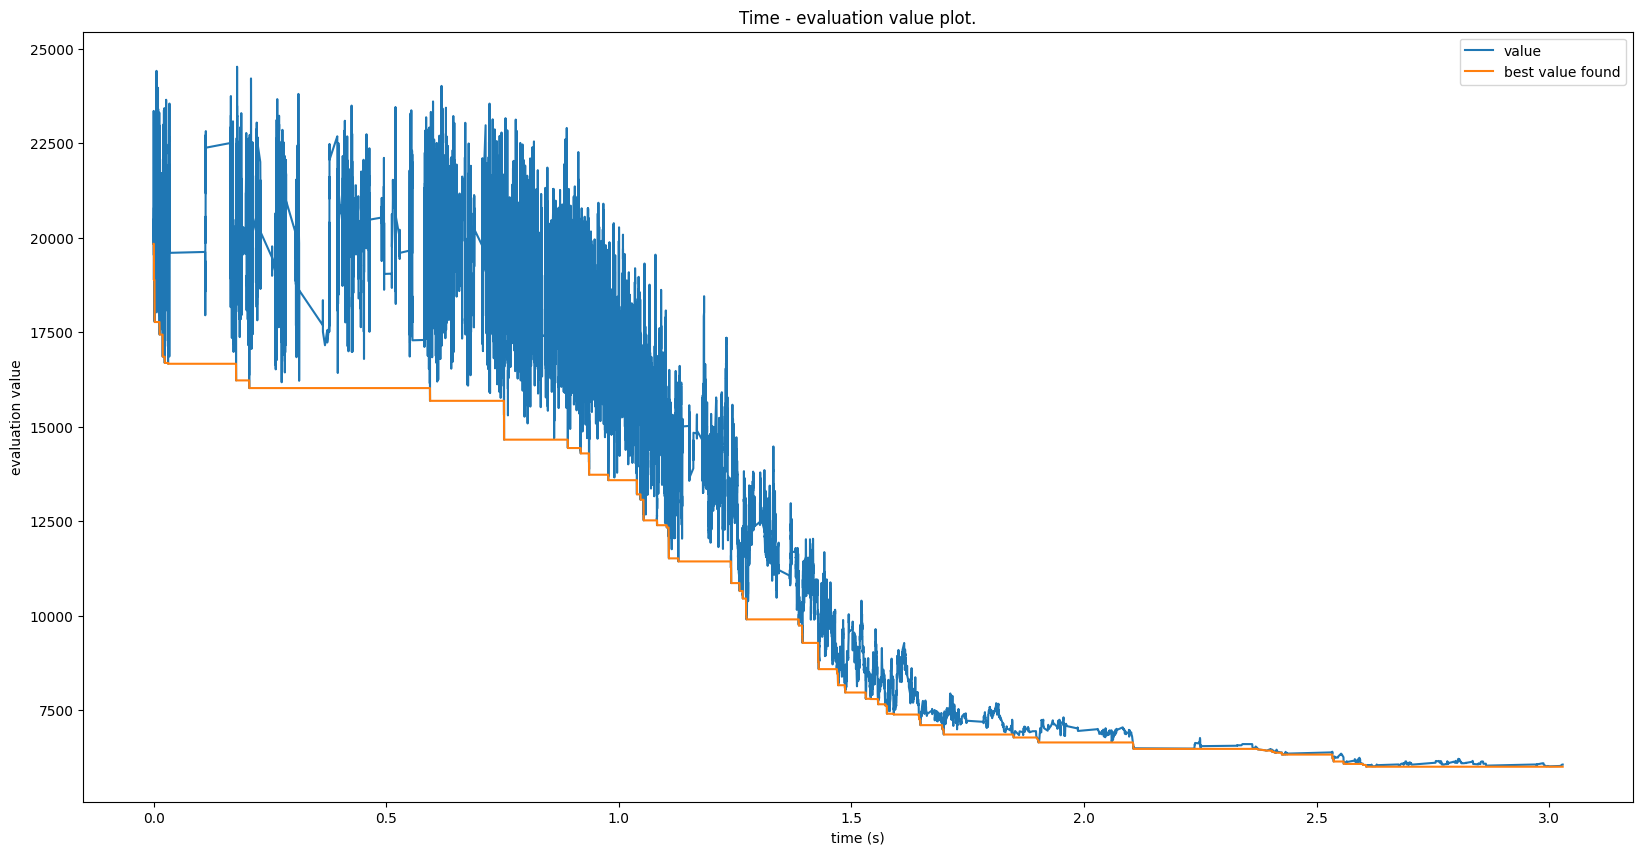

In [6]:
# value-time plot

plot(results_1.data)

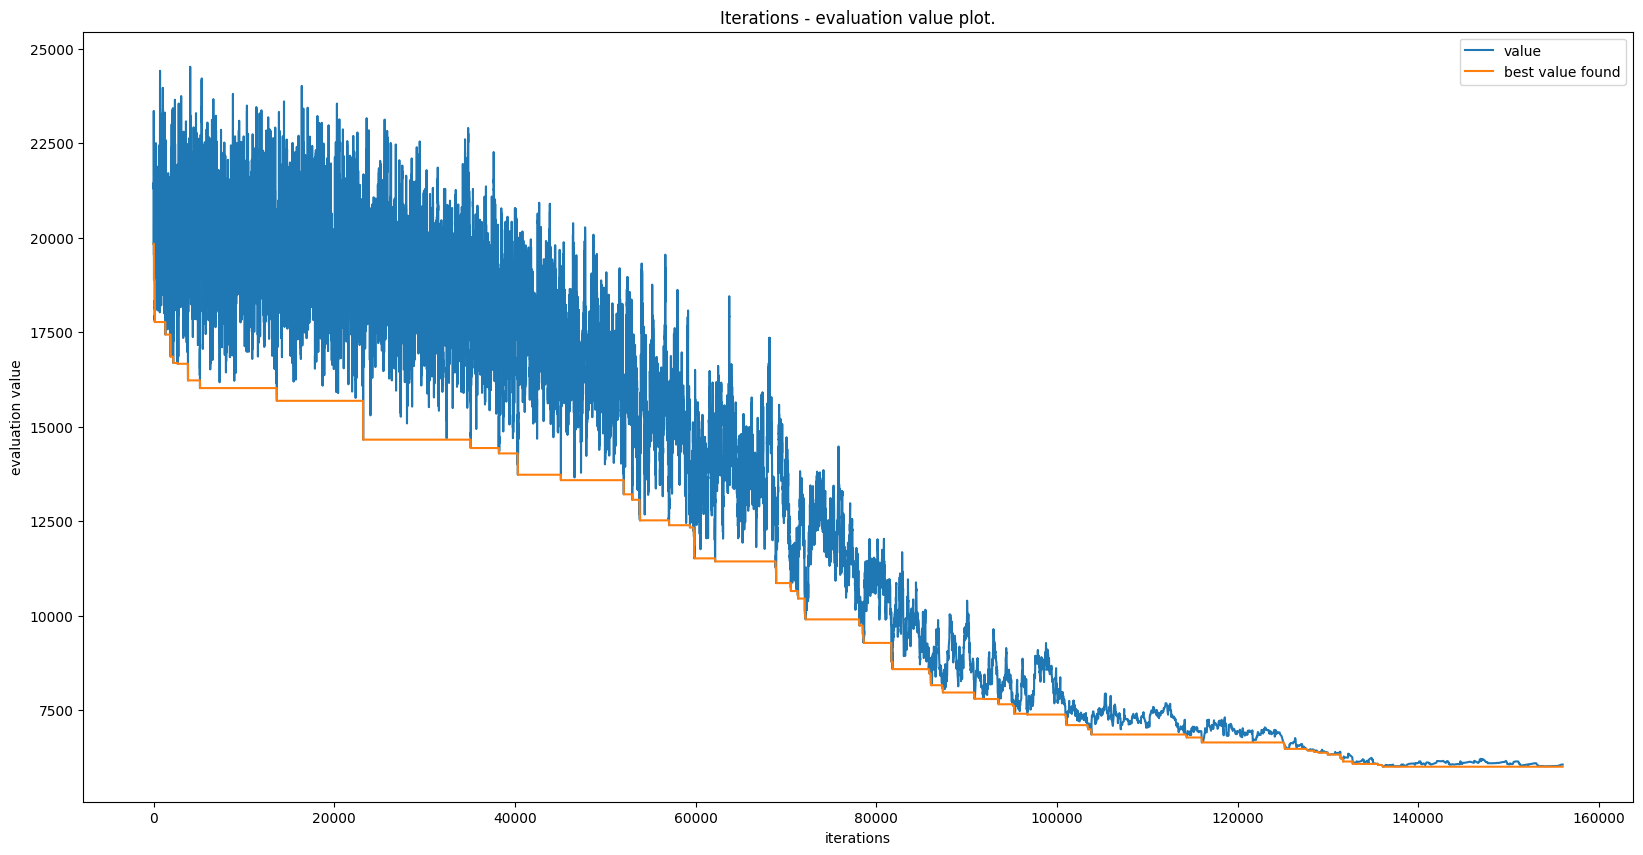

In [7]:
# value-iterations plot

iterations_plot(results_1.data)

### simulated annealing plotting data with matplotlib

In [8]:
# getting data from results (only used for plotting with matplotlib)

data = results_1.data

time = data.time
iterations = data.iteration
temperature = data.temperature
values = data.value
best_values = data.best_value

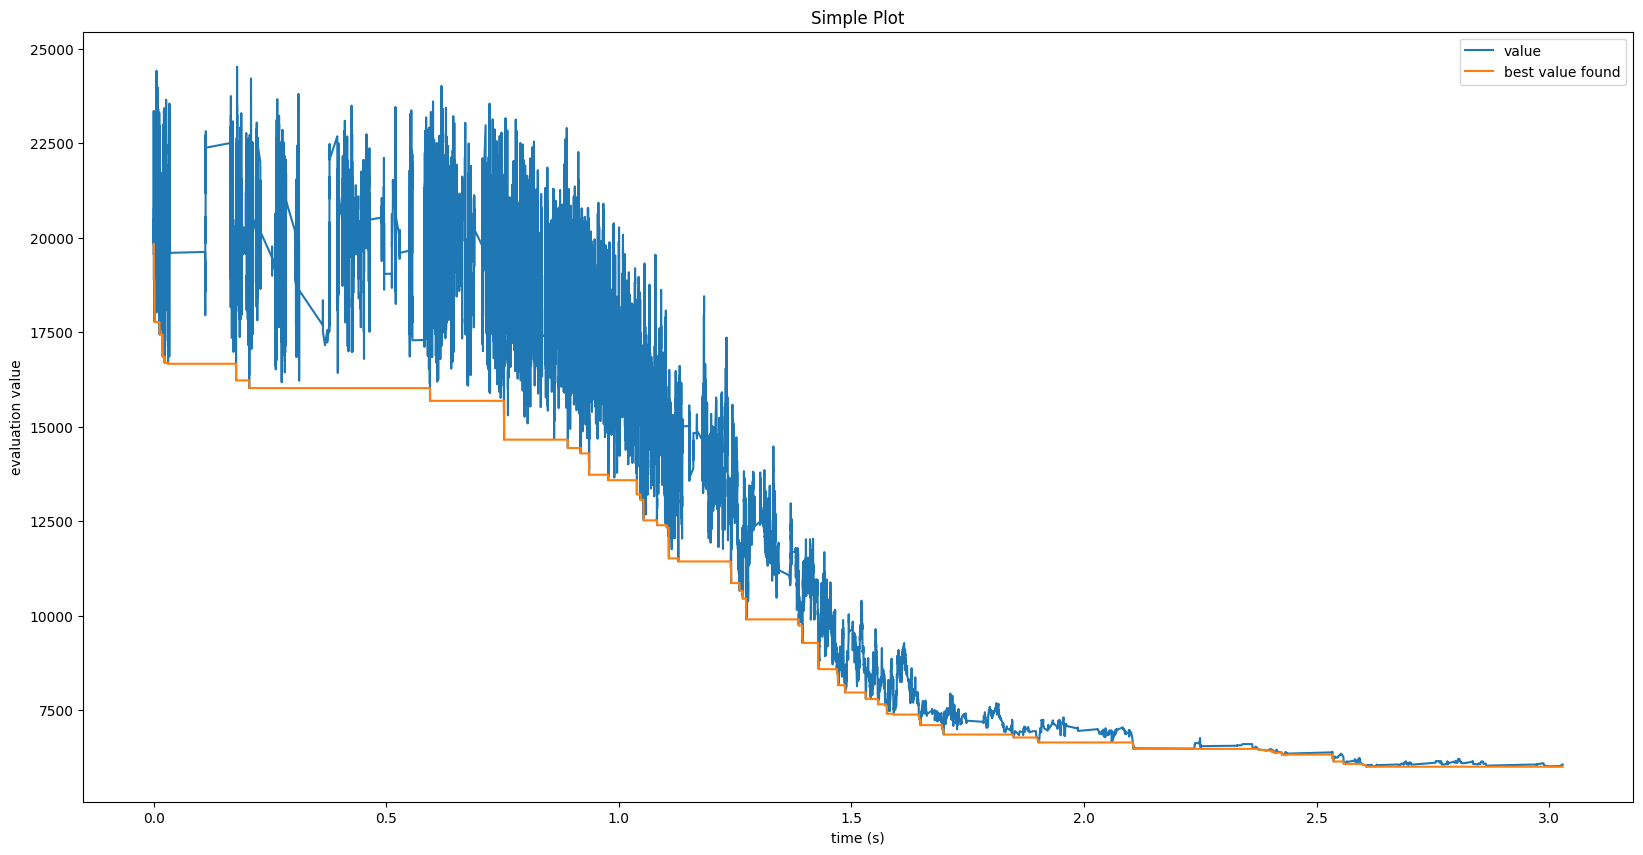

In [9]:
# plotting a value-time plot with matplotlib

plt.figure(figsize=(20,10))
plt.plot(time, values,label='value')
plt.plot(time, best_values, label='best value found')

plt.xlabel('time (s)')
plt.ylabel('evaluation value')

plt.title("Simple Plot")

plt.legend()

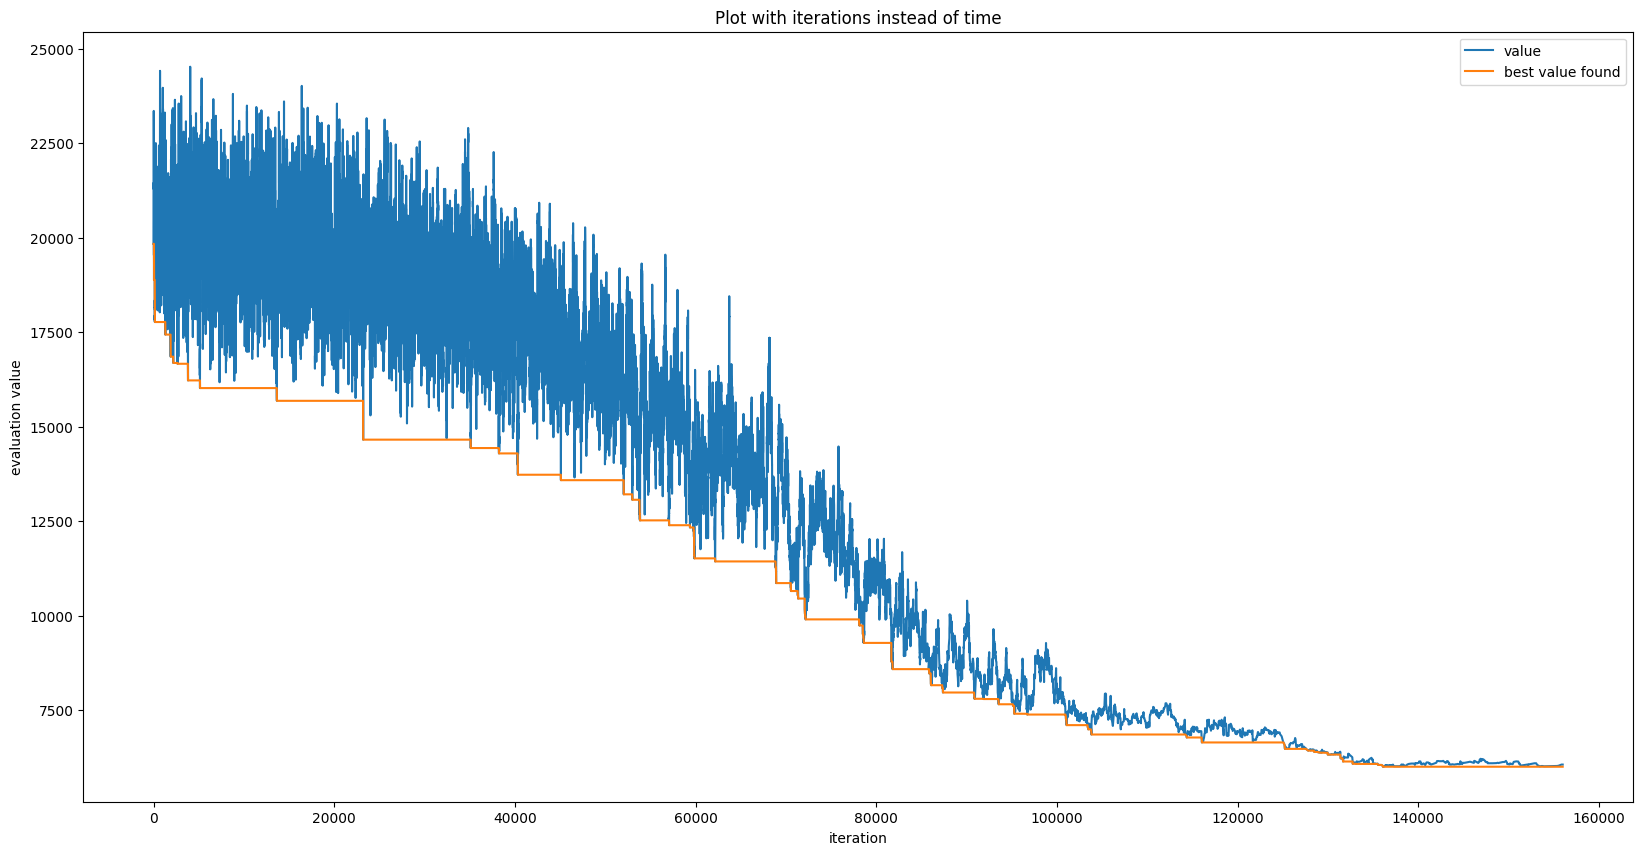

In [10]:
# plotting a value-iteration plot with matplotlib

plt.figure(figsize=(20,10))
plt.plot(iterations, values,label='value')
plt.plot(iterations, best_values, label='best value found')

plt.xlabel('iteration')
plt.ylabel('evaluation value')

plt.title("Plot with iterations instead of time")

plt.legend()

Text(0.5, 1.0, 'Temperature in function of the amount of iterations')

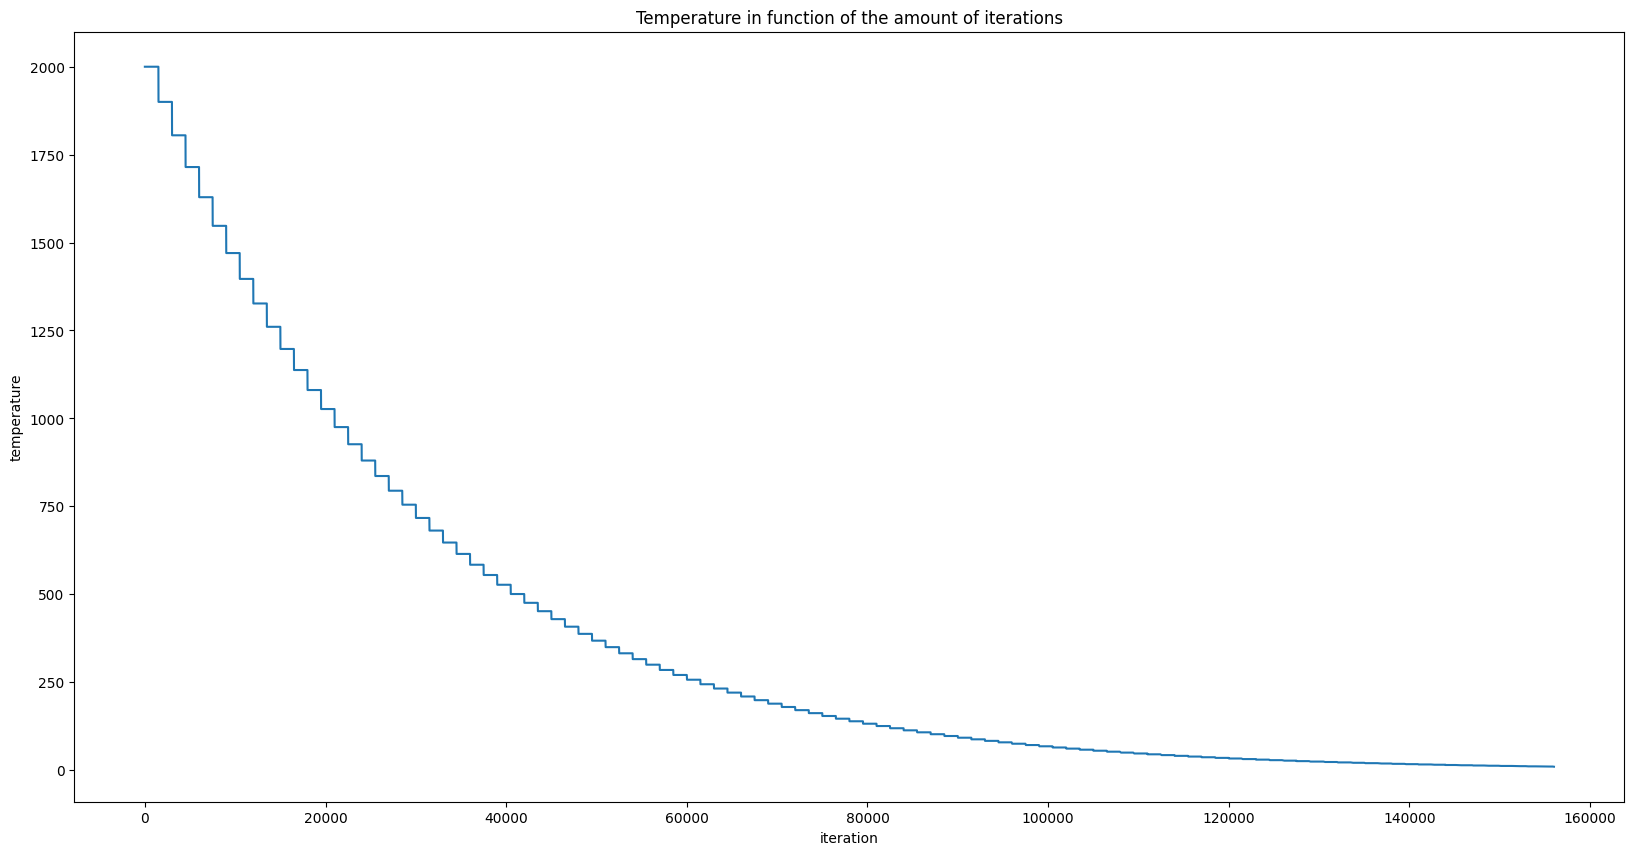

In [11]:
# plotting a temperature-iteration plot with matplotlib

plt.figure(figsize=(20,10))
plt.plot(iterations, temperature)

plt.xlabel('iteration')
plt.ylabel('temperature')

plt.title("Temperature in function of the amount of iterations")

## steepest descent

In [12]:
move_2 = TspArraySwap(size)

evaluation_2 = TspEvaluationFunction(distance_matrix, move_2)

problem_2 = ArrayProblem(evaluation_2, move_2, size)


algorithm_2 = SteepestDescent(problem_2, benchmarking=True, logging=False)
results_2 = algorithm_2.run()
print(results_2)

Results(best_order=array([ 0, 33, 18,  3,  2, 25,  7, 21,  8, 13, 35, 10,  5, 20, 16, 26, 31,
       46,  1, 19, 37, 29, 24, 40, 43, 28, 12, 15, 47, 14, 32,  4, 30, 11,
        9, 23, 36, 39, 38, 41, 34, 44, 42, 22, 17, 45, 27,  6]), best_value=7073, data=Data(time=array([0.       , 0.0052869, 0.0101851, 0.0150278, 0.0198285, 0.0246563,
       0.0294468, 0.034501 , 0.0394019, 0.0443446, 0.0494841, 0.0544878,
       0.0594315, 0.064257 , 0.069027 , 0.0738112, 0.0786462, 0.0834046,
       0.0881676, 0.0928998, 0.097649 , 0.1023835, 0.1071436, 0.1120163,
       0.1167589, 0.1214892, 0.1262107, 0.1309483, 0.1356713, 0.1404344,
       0.1452227, 0.1499809, 0.1547105, 0.1595735, 0.1643294, 0.169152 ,
       0.174123 , 0.1789674, 0.1838375]), iteration=array([ 0,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37]), value=array([19837, 18381, 17226, 16206, 15138, 14149, 13407, 127

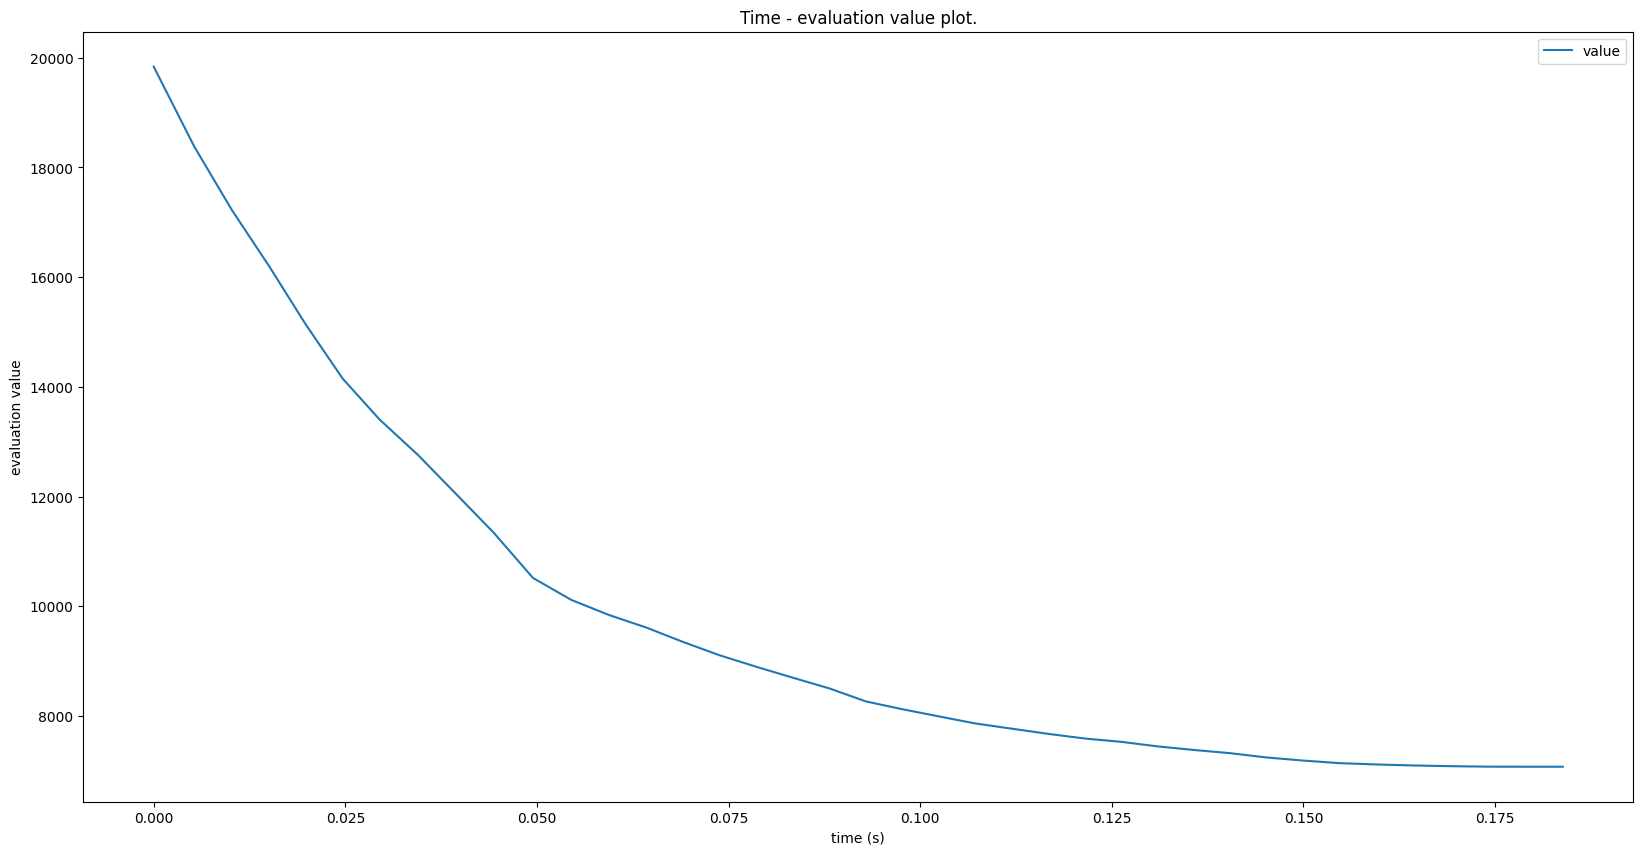

In [13]:
# value-time plot

plot(results_2.data)

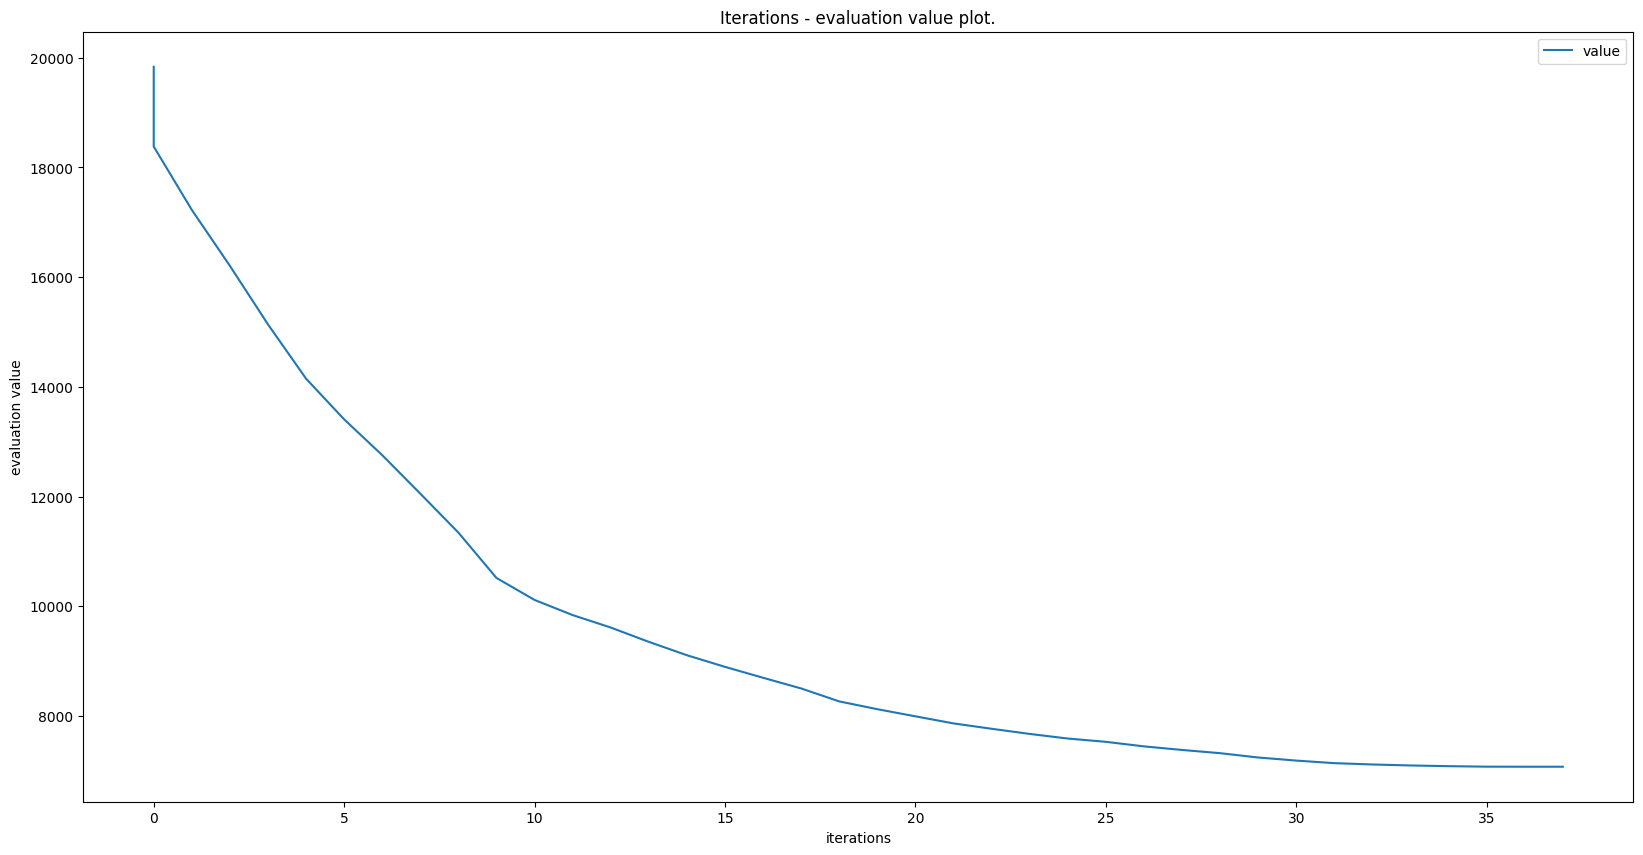

In [14]:
# value-iterations plot

iterations_plot(results_2.data)

## tabu search

In [15]:
move_3 = TspArraySwap(size)

evaluation_3 = TspEvaluationFunction(distance_matrix, move_3)

problem_3 = ArrayProblem(evaluation_3, move_3, size)

termination_3 = MaxSecondsTerminationCriterion(10)

diff_state_3 = SumDiffState()

algorithm_3 = TabuSearch(problem_3, termination_3, diff_state_3, 11, benchmarking=True, logging=False)
results_3 = algorithm_3.run()
print(results_3)

Results(best_order=array([ 0,  2, 18,  3, 29,  1, 46, 25,  5, 13,  8, 35, 10, 15, 47, 12,  6,
       27, 45, 33, 24, 22, 17,  7, 21, 20, 16, 26, 31,  4, 11,  9, 30, 32,
       14, 23, 36, 39, 38, 41, 34, 19, 37, 44, 42, 40, 43, 28]), best_value=6294, data=Data(time=array([0.00000000e+00, 5.26190000e-03, 1.04979000e-02, ...,
       9.99912290e+00, 1.00040896e+01, 1.00040935e+01]), iteration=array([   0,    0,    1, ..., 1939, 1940, 1941]), value=array([19837, 18381, 17226, ...,  6347,  6347,  6347]), best_value=array([19837, 18381, 17226, ...,  6294,  6294,  6294])))


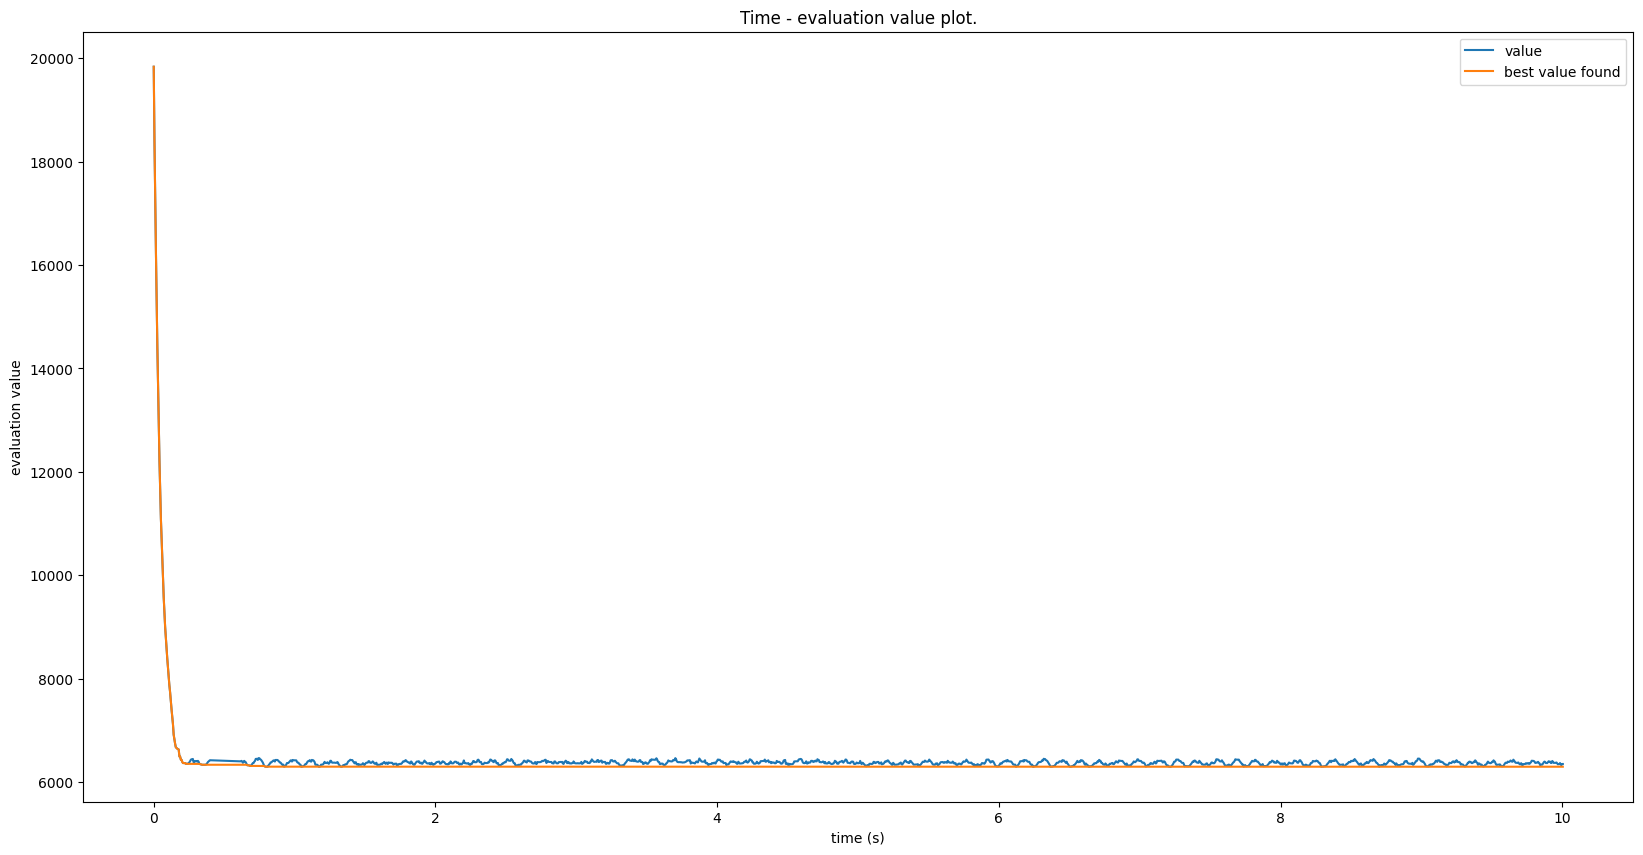

In [16]:
# value-time plot

plot(results_3.data)

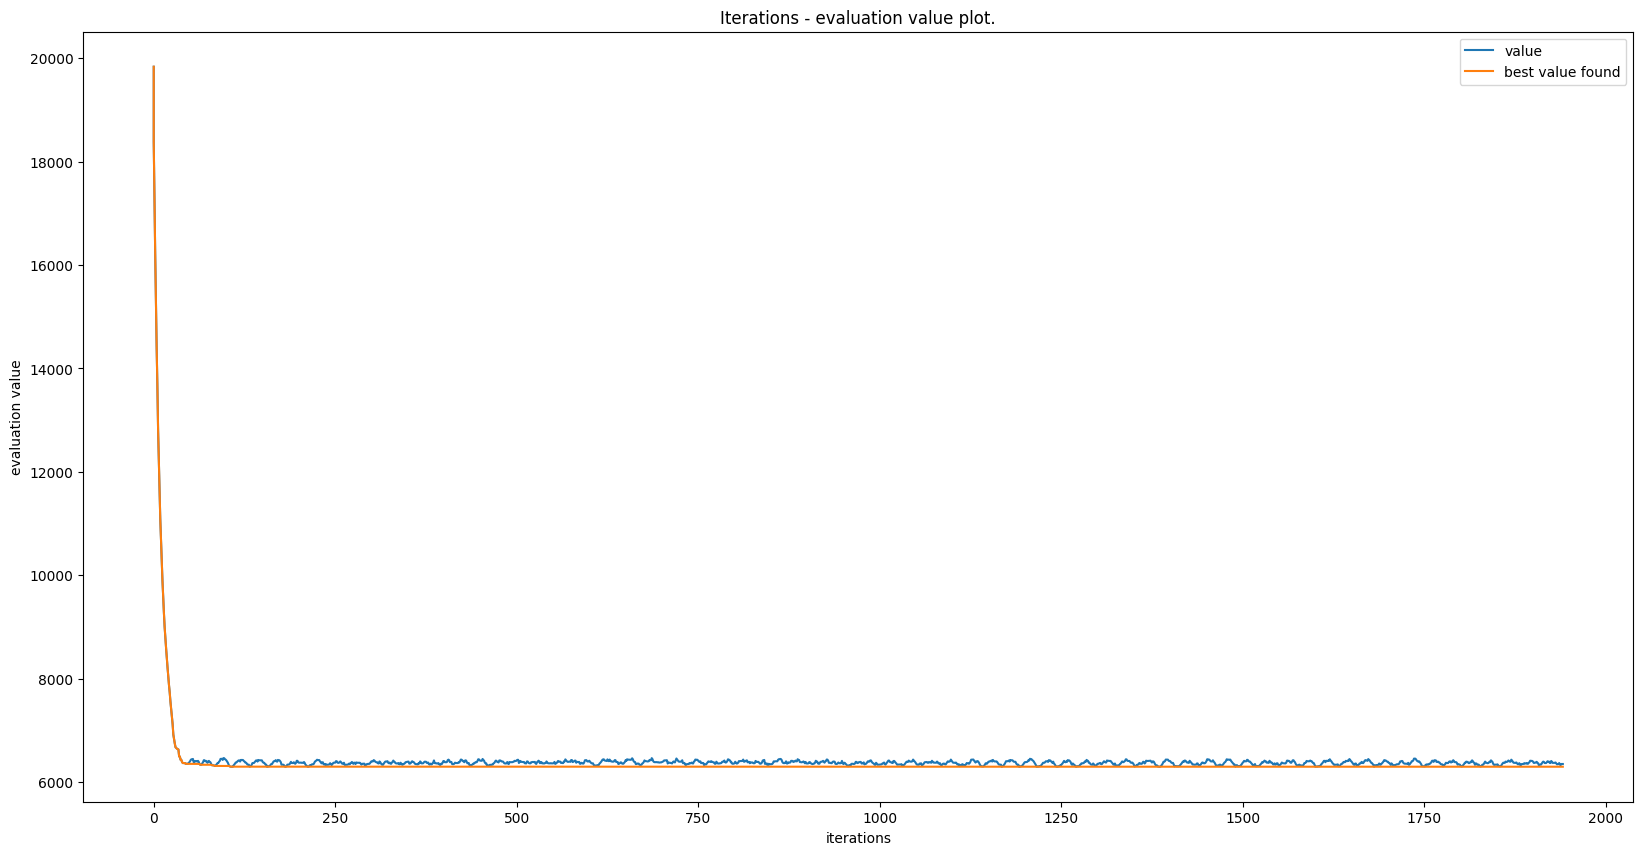

In [17]:
# value-iterations plot

iterations_plot(results_3.data)

## variable neighbourhood search

In [18]:
move_a = TspArraySwap(size)
move_b = ArrayReverseOrder(size)

moves = [move_a, move_b]

move_4 = MultiNeighbourhood(moves)

evaluation_4 = TspEvaluationFunction(distance_matrix, move_4)

problem_4 = ArrayProblem(evaluation_4, move_4, size)


algorithm_4 = VariableNeighbourhood(problem_4, benchmarking=True, logging=False)
results_4 = algorithm_4.run()
print(results_4)

Results(best_order=array([ 6, 28,  0, 12, 47, 15, 10, 35,  5, 13,  8, 20, 16, 26, 31, 21,  7,
       25, 14, 32,  4, 30, 11,  9, 23, 36, 46, 17, 45, 33, 22, 42, 44,  1,
       39, 38, 41, 34, 19, 37, 29,  3, 18,  2, 24, 40, 43, 27]), best_value=5097, data=Data(time=array([0.       , 0.0051903, 0.0101489, 0.0151318, 0.0200904, 0.0250437,
       0.0301555, 0.0352954, 0.0402895, 0.0451792, 0.0501377, 0.0550297,
       0.0600154, 0.0651374, 0.0700722, 0.074947 , 0.0798427, 0.0854286,
       0.090509 , 0.0956526, 0.1008004, 0.1057022, 0.110637 , 0.1155605,
       0.1204428, 0.125331 , 0.1302975, 0.1351607, 0.1400095, 0.1449642,
       0.1498299, 0.1547591, 0.1599124, 0.1648305, 0.169775 , 0.174805 ,
       0.1797052, 0.1845842, 0.2123923, 0.2398793, 0.2448726, 0.249753 ,
       0.2546785, 0.2595562, 0.2644358, 0.2694475, 0.296791 , 0.3017192,
       0.3066251, 0.3116583, 0.3166469, 0.3216315, 0.3265766, 0.3314642,
       0.35899  , 0.3638444, 0.3686879, 0.3959388, 0.4233945, 0.4508006,
    

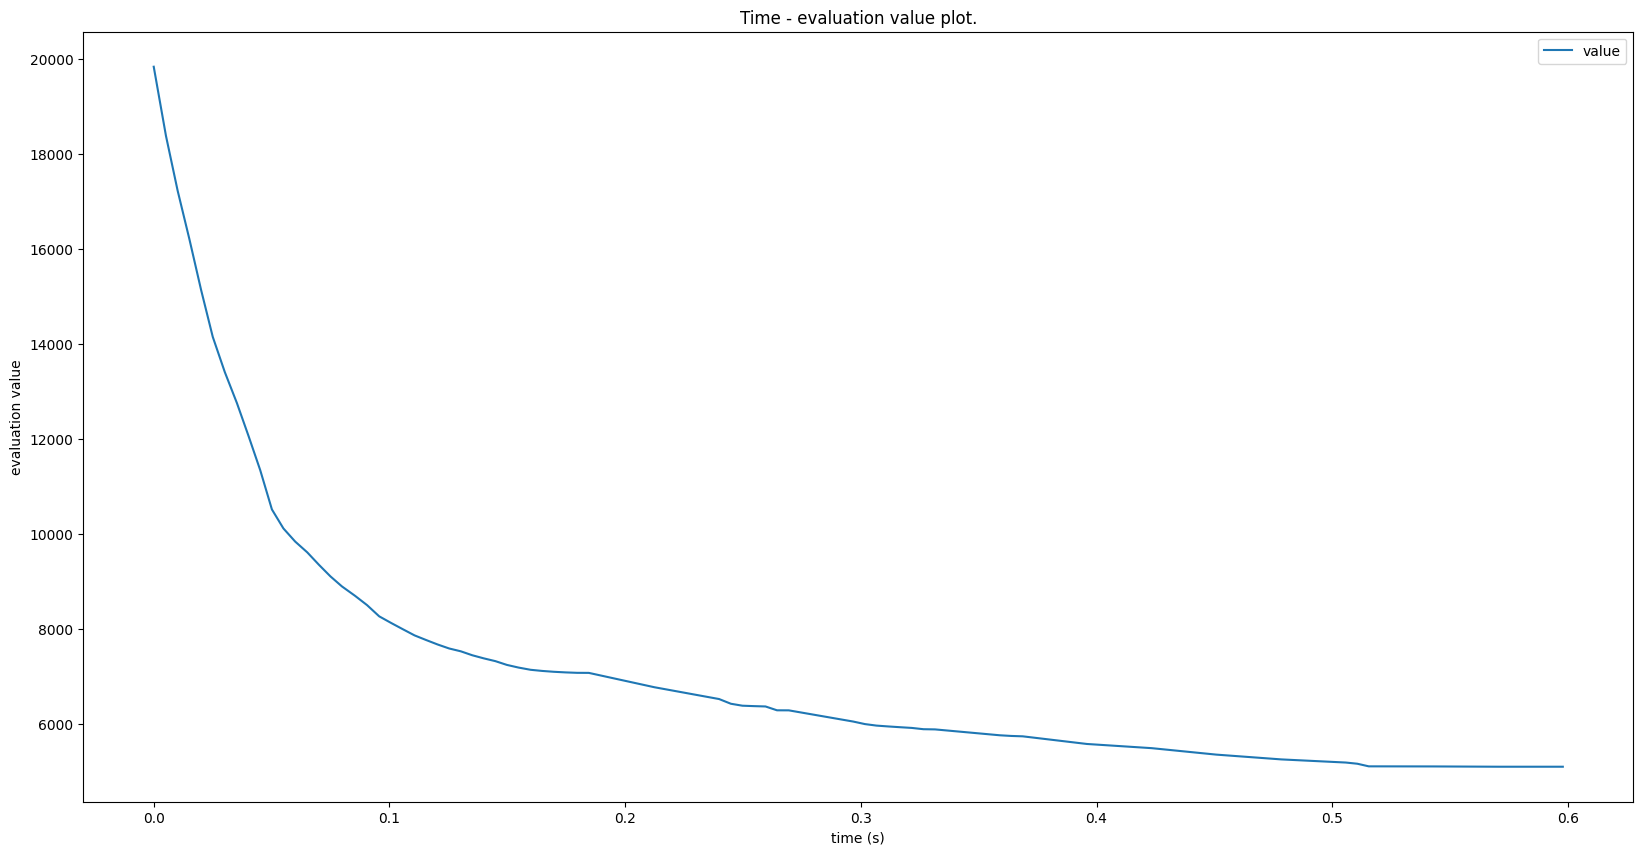

In [19]:
# value-time plot

plot(results_4.data)

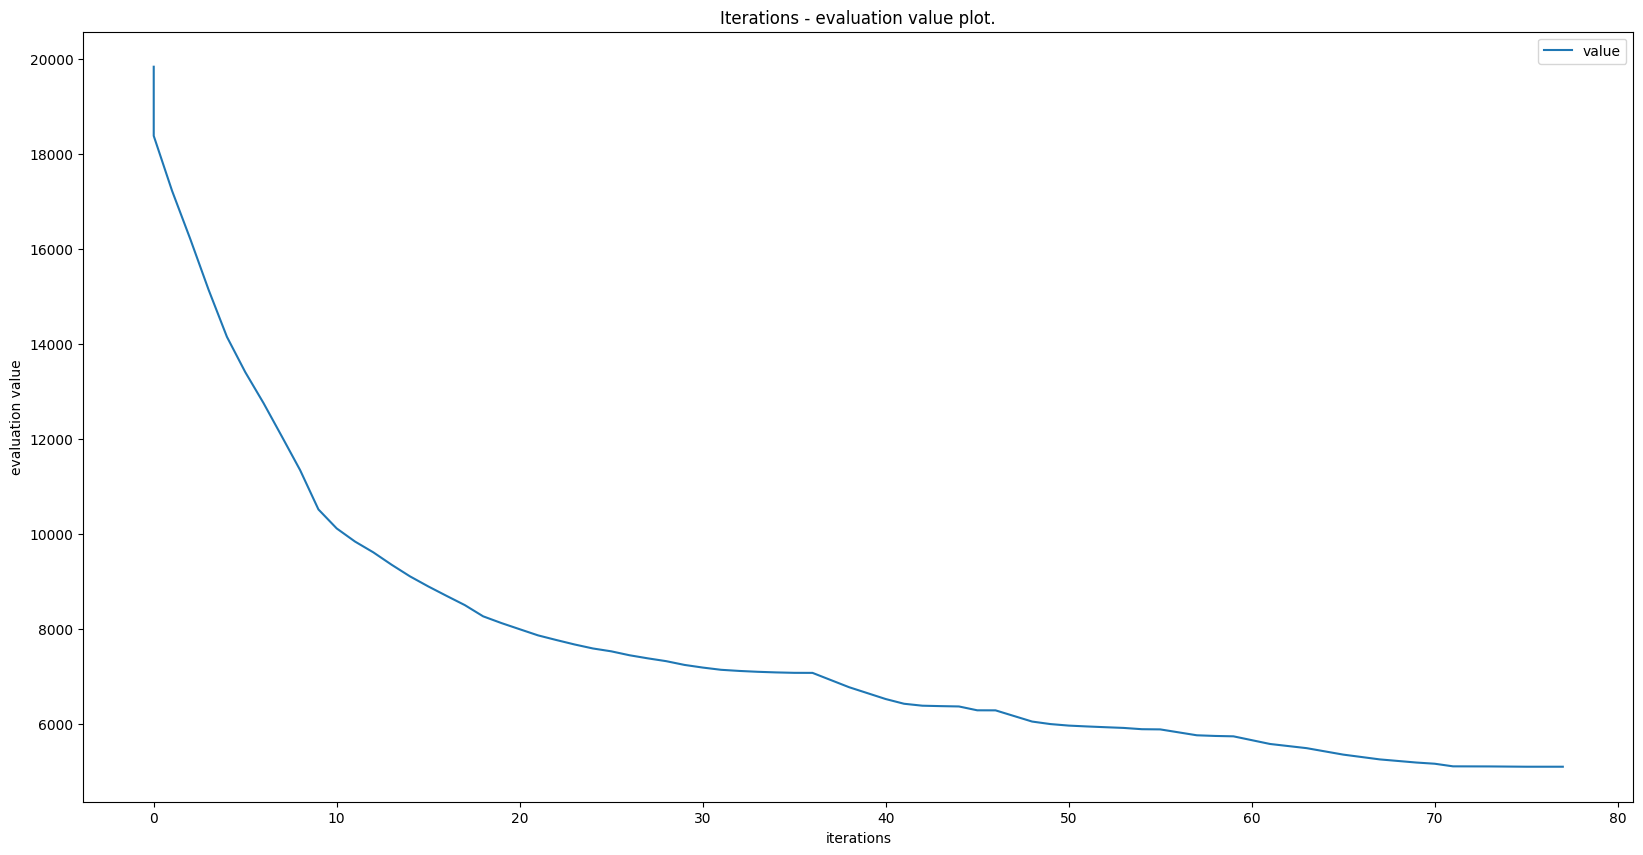

In [20]:
# value-iterations plot

iterations_plot(results_4.data)